In [1]:
#EasyLang to Python 

#Part1 : Importing the libraries required
import datetime
import pandas as pd
import csv
import matplotlib.pyplot as plt
import math
import talib as talib
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Part 2 : Reading the data from the file  
try:

    mkdata=pd.read_csv("C:/Users/Mikayla/Desktop/USRaw.txt", index_col = 0, parse_dates=True) #Reading the data from a file on my desktop and saving loading them into mkdata
    print(mkdata.tail()) # printing out the data just to make sure we actually have some data in mkdata 
except:
    print("MkError")
      
    

             Time       Open       High        Low      Close      Up    Down
Date                                                                         
2020-07-20  14:00  179.68750  180.46875  179.68750  180.18750   82667   81960
2020-07-21  14:00  180.25000  180.62500  179.84375  180.34375   92510   78915
2020-07-22  14:00  180.34375  181.00000  180.25000  180.53125   99732  116722
2020-07-23  14:00  180.53125  181.31250  180.50000  181.25000  115017  113144
2020-07-24  14:00  181.28125  181.93750  180.71875  181.03125  123370  104883


In [3]:
#Part 3: Creating an MKTrend function (Which allows me to call it multiple times if i want to )
def MKTrend(alpha,mkdf) :
    last_price=0# used for Price[1]
    scnd2last_price=0;# used for Price[2]
        
    last_casino=0 # used for casino[1]
    scnd2last_casino=0;# used for casino[2]
       
    mkdf['Price']=(mkdf['High']+mkdf['Low'])/2 # defining the price
    itr=0 #This is saying today - 1 = Yesterday
    currentbar=0
    for index,row in mkdf.iterrows(): #The loop+
        
        try:
            Casino = (alpha - alpha * alpha/4) *row['Price'] +0.5*alpha*alpha*last_price-(alpha-0.75*alpha*alpha)* scnd2last_price +2*(1-alpha)*last_casino-(1-alpha)* (1-alpha)*scnd2last_casino
        except:
            print("MkError")
            currentbar=row-itr# the current bar is equal to the live bar minus the iterations weve done.
        if currentbar<7 :
                Casino=(row['Price'] + 2*last_price + scnd2last_price)/4
            
        Glock=2*Casino-scnd2last_casino
        
        
        mkdf.loc[index,'Cal_Casino'] = round (Casino,2)
        mkdf.loc[index,'Cal_Glock'] = round (Glock,2)
            
          #instead of using a list , im just using simple variables   
        scnd2last_casino=last_casino
        scnd2last_price=last_price
        last_casino=Casino
        last_price=row['Price']
        itr=itr+1
                    
#end of function

In [4]:
#Part 4 : Executing the function 
MKTrend(0.07,mkdata)

In [5]:
#Part 5 : Showing the results
print(mkdata.tail())

             Time       Open       High        Low      Close      Up    Down  \
Date                                                                            
2020-07-20  14:00  179.68750  180.46875  179.68750  180.18750   82667   81960   
2020-07-21  14:00  180.25000  180.62500  179.84375  180.34375   92510   78915   
2020-07-22  14:00  180.34375  181.00000  180.25000  180.53125   99732  116722   
2020-07-23  14:00  180.53125  181.31250  180.50000  181.25000  115017  113144   
2020-07-24  14:00  181.28125  181.93750  180.71875  181.03125  123370  104883   

                 Price  Cal_Casino  Cal_Glock  
Date                                           
2020-07-20  180.078125      180.05     180.23  
2020-07-21  180.234375      180.12     180.31  
2020-07-22  180.625000      180.29     180.53  
2020-07-23  180.906250      180.60     181.08  
2020-07-24  181.328125      180.94     181.59  


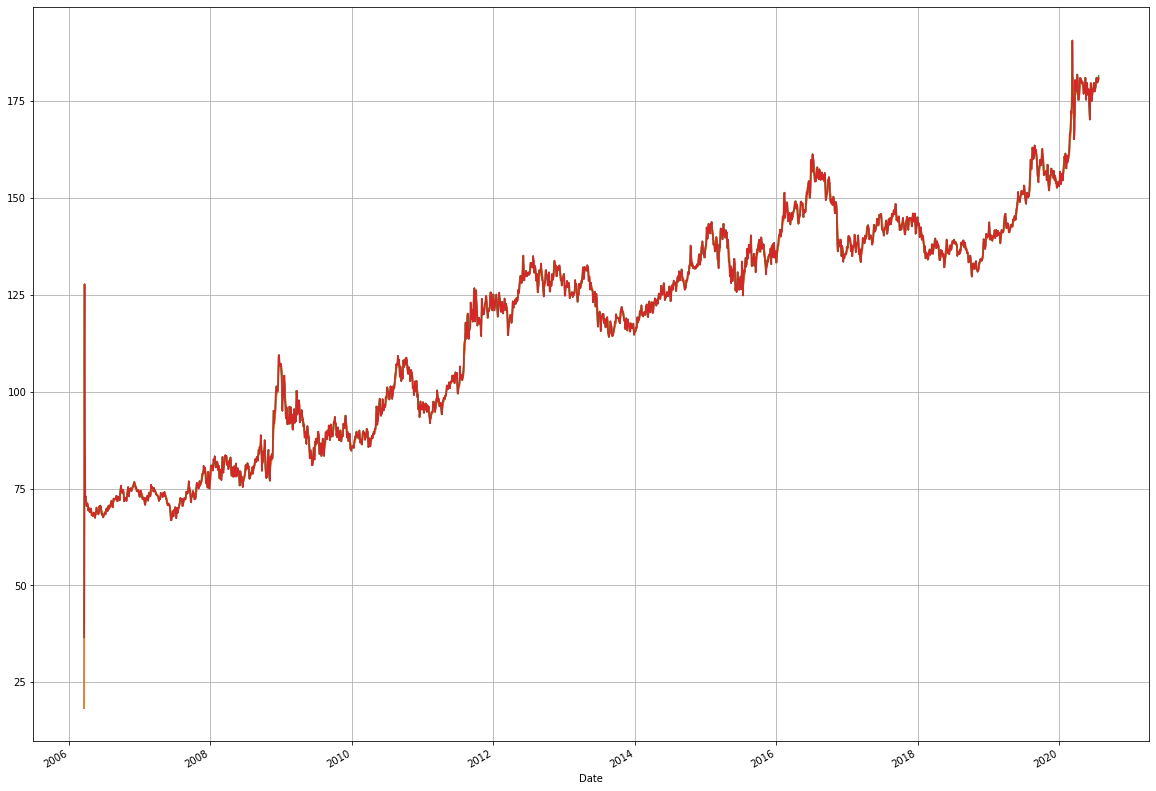

In [6]:
#Part 6 : Plots

pylab.rcParams['figure.figsize']=(20,15)
mkdata['Cal_Casino'].plot(grid=True)
mkdata['Cal_Casino'].shift(1).plot(grid=True)

pylab.rcParams['figure.figsize']=(20,15)
mkdata['Cal_Glock'].plot(grid=True)
mkdata['Cal_Glock'].shift(1).plot(grid=True)
